In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [3]:
df.shape

(103, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


# Data Cleaning

In [5]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [6]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [7]:
df.rename(columns={'Production (Tons)':'Production(Tons)',
                   'Production per Person (Kg)':'Production_per_Person(Kg)',
                   'Acreage (Hectare)':'Acreage(Hectare)',
                   'Yield (Kg / Hectare)':'Yield(Kg/Hectare)'},inplace=True)
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [9]:
df[df['Acreage(Hectare)'].isna()]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [10]:
df=df.dropna().reset_index().drop('index',axis=1)

In [11]:
df.shape

(102, 6)

In [12]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [13]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [14]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)']=df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

# Univariate Analysis

In [15]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<Axes: xlabel='Continent'>

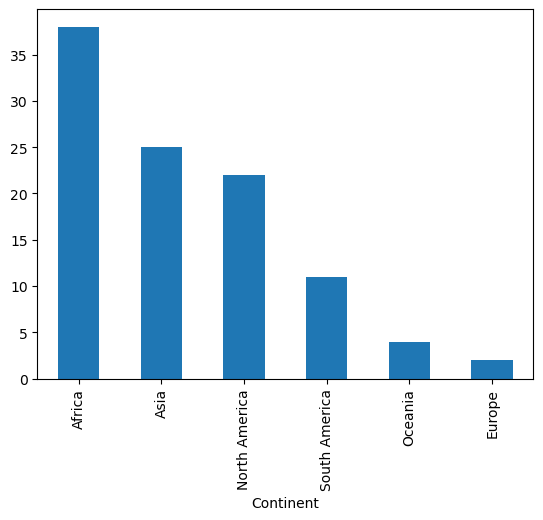

In [16]:
df['Continent'].value_counts().plot(kind='bar')

<Axes: ylabel='Yield(Kg/Hectare)'>

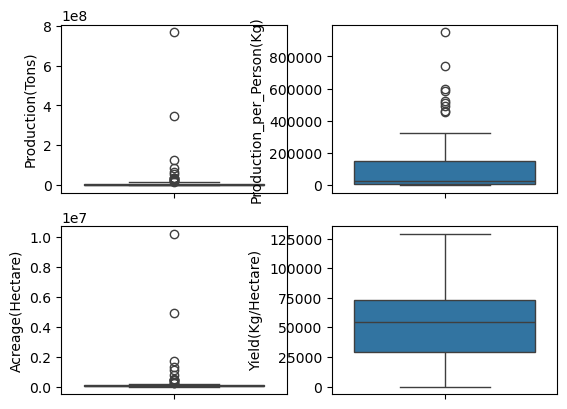

In [17]:
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

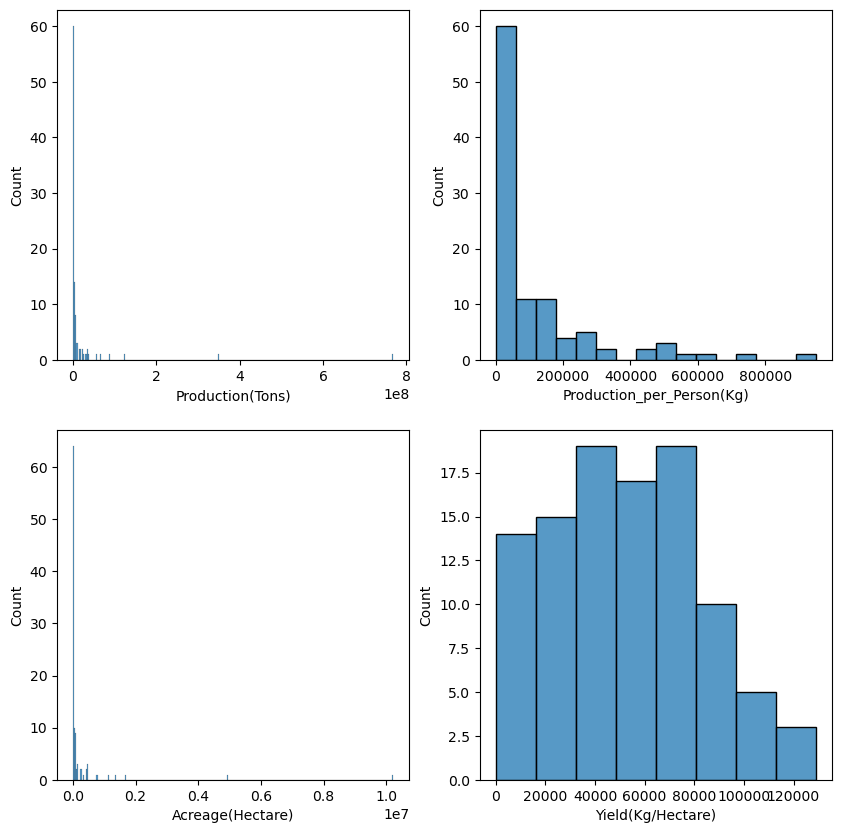

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.histplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.histplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.histplot(df['Yield(Kg/Hectare)'])
plt.show()

<Axes: ylabel='Production(Tons)'>

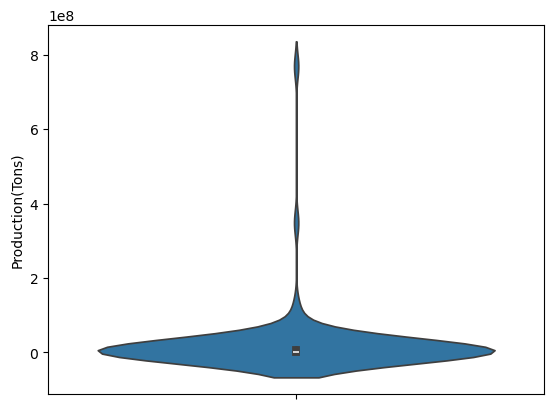

In [19]:
sns.violinplot(df['Production(Tons)'])

# Bivariate Analysis

In [20]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [21]:
df_new=df[['Country','Production(Tons)']].set_index('Country')
df_new['Production_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()
df_new.head()

,Production(Tons),Production_percent
Country,,
Brazil,768678382.0,40.727285
India,348448000.0,18.462001
China,123059739.0,6.520138
Thailand,87468496.0,4.634389
Pakistan,65450704.0,3.467809


<Axes: ylabel='Production_percent'>

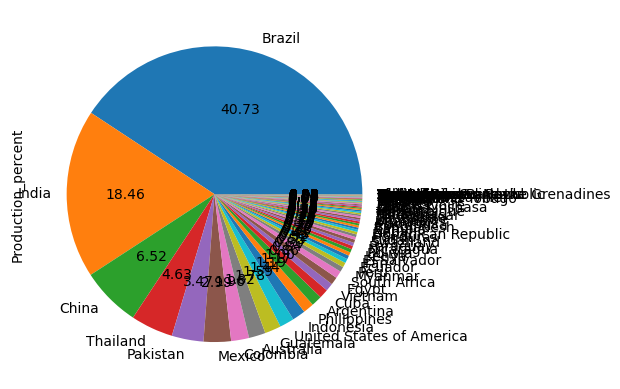

In [22]:
df_new['Production_percent'].plot(kind='pie',autopct='%.2f')

C:\Users\MY LENOVO\AppData\Local\Temp\ipykernel_21108\1411902157.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


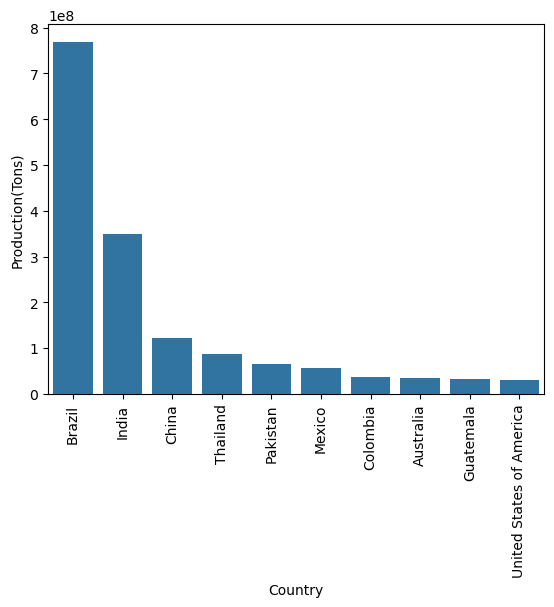

In [23]:
df_high=df.sort_values('Production(Tons)',ascending=False)
ax=sns.barplot(data=df_high.head(10),x='Country',y='Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<Axes: xlabel='Country'>

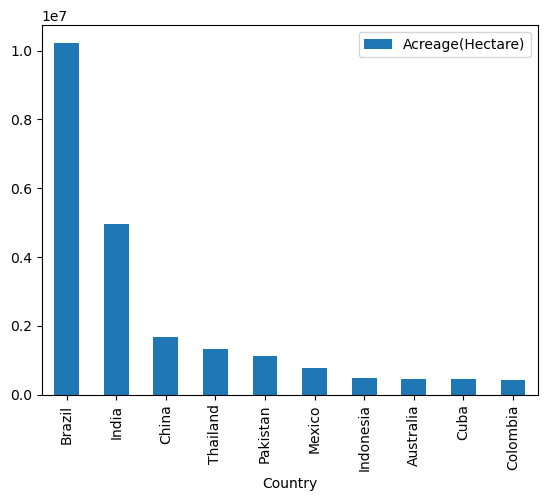

In [24]:
df_high=df.sort_values('Acreage(Hectare)',ascending=False)
df_high[['Country','Acreage(Hectare)']].head(10).set_index('Country').plot(kind='bar')

<Axes: xlabel='Country'>

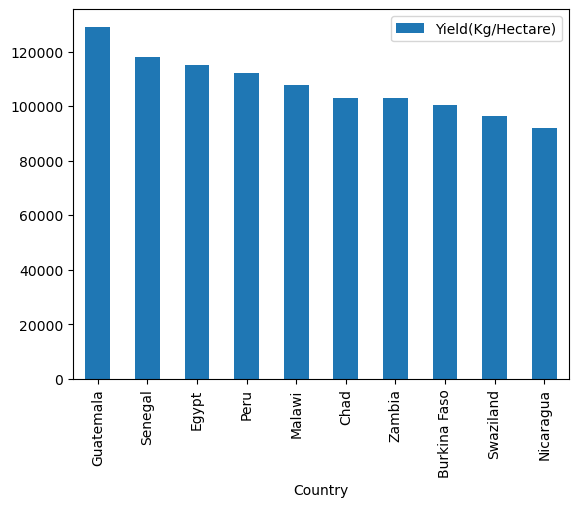

In [25]:
df_high=df.sort_values('Yield(Kg/Hectare)',ascending=False)
df_high[['Country','Yield(Kg/Hectare)']].head(10).set_index('Country').plot(kind='bar')

<Axes: xlabel='Country'>

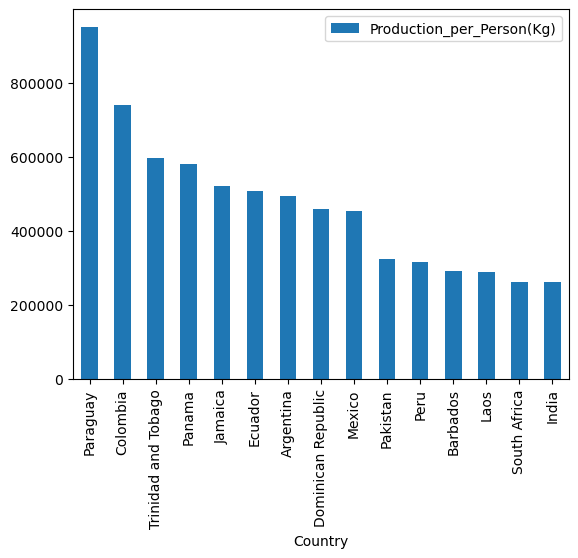

In [26]:
df_high=df.sort_values('Production_per_Person(Kg)',ascending=False)
df_high[['Country','Production_per_Person(Kg)']].head(15).set_index('Country').plot(kind='bar')

In [27]:
df.corr(numeric_only=True)

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

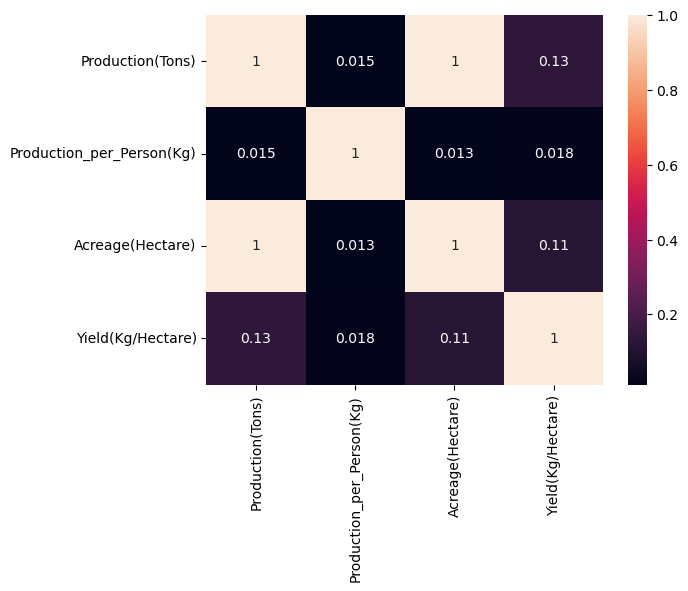

In [28]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [29]:
sns.__version__

'0.13.2'

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

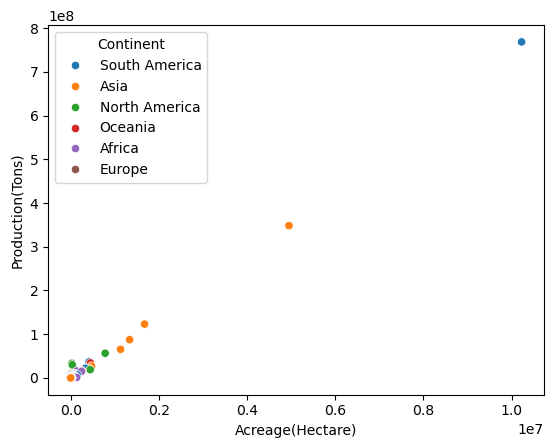

In [30]:
sns.scatterplot(data=df,x='Acreage(Hectare)',y='Production(Tons)',hue='Continent')

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

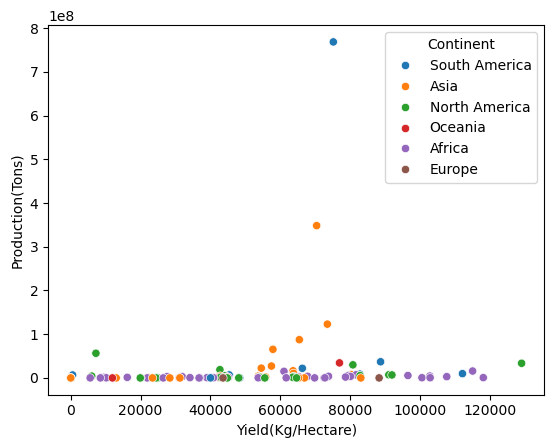

In [31]:
sns.scatterplot(data=df,x='Yield(Kg/Hectare)',y='Production(Tons)',hue='Continent')

# Analysis of Continents

In [50]:
df_continent=df.groupby('Continent').sum()
df_continent['no_of_countries']=df.groupby('Continent').count()['Country']
df_continent=df_continent.drop('Country',axis=1)
df_continent.head()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),no_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4


<Axes: xlabel='Continent'>

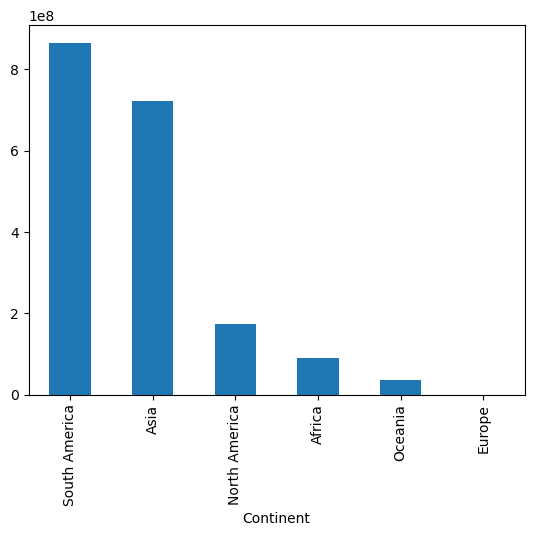

In [56]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

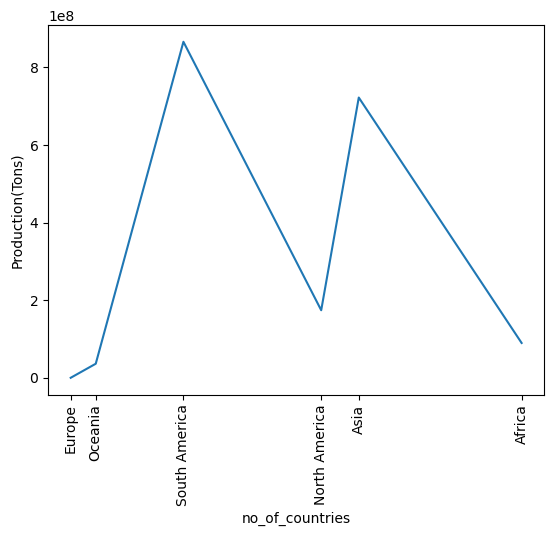

In [68]:
countries_list=df_continent.index.to_list()
sns.lineplot(x=df_continent['no_of_countries'],y=df_continent['Production(Tons)'])
plt.xticks(df_continent['no_of_countries'],countries_list,rotation=90)
plt.show()

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

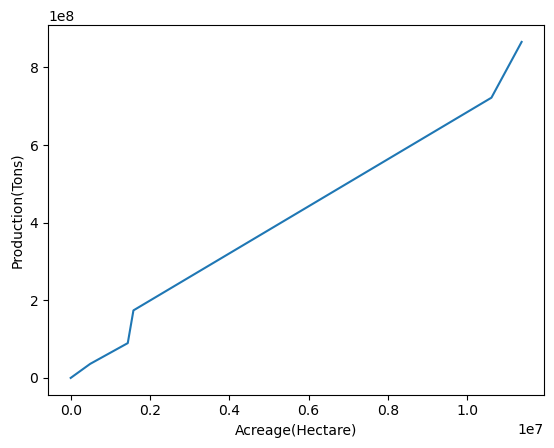

In [64]:
sns.lineplot(x=df_continent['Acreage(Hectare)'],y=df_continent['Production(Tons)'])

<Axes: ylabel='Production(Tons)'>

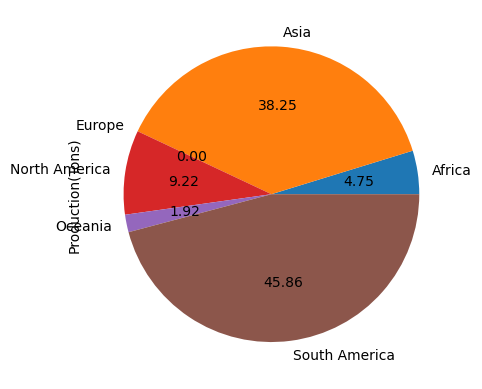

In [65]:
df_continent['Production(Tons)'].plot(kind='pie',autopct='%.2f')

In [66]:
df_continent.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),no_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_Person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
no_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
